In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf_file = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT')

In [3]:
x, y, m606c, m814c, nstar, sat606, sat814, camera, m606, s606, q606, o606, \
f606, g606, rxs606, sky606, rmssky606, m814, s814, q814, o814, f814, \
g814, rxs814, sky814, rmssky814, ra, dec = 0, 1, 2, 3, 4, 5, 6, 7, 8, \
9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27

In [4]:
psf_g = psf_file[psf_file[:,m814c]>10]

psf_idx = np.argsort(psf_g[:,m814c])[:1000]
psf_1000 = psf_g[psf_idx]

In [5]:
dir = 'catRawMags1305/catDir/'
flc_100 = np.genfromtxt(dir+'flc100source.dat')

In [6]:
flcRoPSF = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_0206flcRoPSF.dat')

In [7]:
def rot(x0,y0):

    theta = np.deg2rad(95.424057+180)
#     theta = np.deg2rad(180)
    c, s = np.cos(theta), np.sin(theta)

    x = c*x0 - s*y0
    y = s*x0 + c*y0
    
    
    return x, y

In [8]:
roPSF_x, roPSF_y = rot(flcRoPSF[:,0],flcRoPSF[:,1])  

NameError: name 'psf_100' is not defined

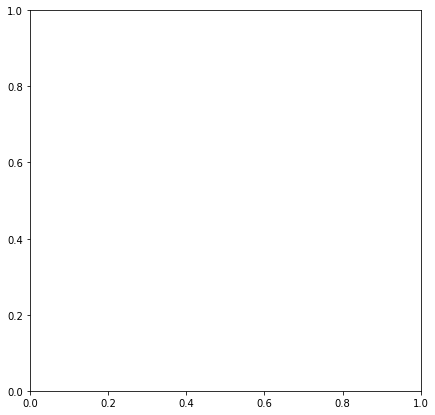

In [9]:
# fig, ax = plt.subplots(figsize=(7,7))

# colors=['indianred','orange','goldenrod','seagreen','turquoise','rebeccapurple']
# # psf_idx = [14,15,16,18,22,25]
# # flc_idx = [8,9,10,12,16,18]
# # for cc in range(len(colors)):
# # #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# # #             marker='o',facecolor='none',edgecolor=colors[cc])
# #     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
# #             marker='o',color='none',edgecolor=colors[cc])

# ax.scatter(psf_100[:,0][:50],psf_100[:,1][:50],label='PSF',s=20)
# ax.scatter(roPSF_x[:50]+1899,roPSF_y[:50]+7065,label='FLC Rot Off',s=20)
# # ax.scatter(flcRoPSF[:,0][:50],flcRoPSF[:,1][:50],label='FLC Rot Off',s=20)

# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


# ax.legend()
# plt.show()

In [10]:
drcPSF = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_0206drcPSF.dat')

In [11]:
drcPSF_1000 = drcPSF[:1000]

NameError: name 'psf_100' is not defined

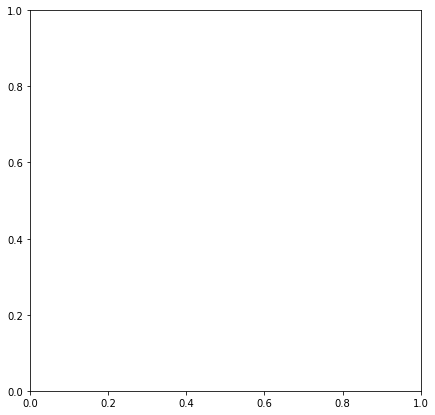

In [12]:
# fig, ax = plt.subplots(figsize=(7,7))

# ax.scatter(psf_100[:,0][:50],psf_100[:,1][:50],label='PSF',s=20)
# # ax.scatter(roPSF_x[:50]+1899,roPSF_y[:50]+7065,label='FLC Rot Off',s=20)
# ax.scatter(drcPSF[:,0][:50],drcPSF[:,1][:50],label='DRC',s=20)

# ax.set_title('Lin Transform 50 DRC pixel pos')


# ax.legend()
# plt.show()

In [13]:
master = psf_1000
idxP1000 = np.arange(0,len(master),1)

mas_x = master[:,x]
mas_y = master[:,y]

matchids = np.zeros((len(master),1))

matchtol= 200

nF = True
row = 0

while (nF): # not finished
    matchrows = drcPSF_1000[(abs(mas_x[row] - drcPSF_1000[:,0]) <= \
    matchtol) & (abs(mas_y[row] - drcPSF_1000[:,1]) <= matchtol)]
    
    if (len(matchrows) == 1):
        matchids[row] = idxP1000[row]
        row = row + 1
    else:
        master = np.delete(master, row, 0)
        idxP1000 = np.delete(idxP1000, row, 0)
        matchids = np.delete(matchids,row,0)

    if (row >= len(master)):
        nF = False

In [14]:
len(master)

0

In [15]:
master = psf_1000
idxP1000 = np.arange(0,len(master),1)

mas_x = master[:,x]
mas_y = master[:,y]

In [16]:
match = np.genfromtxt('catRawMags1305/catDir/matched_w_MagsPos2705r2.dat')

In [17]:
ids = np.zeros((len(match),1))
ids[:,0] = np.arange(0,len(match),1)

In [18]:
match = np.hstack((match,ids))

In [19]:
RA, DEC, flux, flags, c_star, mag1, mag2, mag3, mag4, ra1, dec1, \
ra2, dec2, ra3, dec3, ra4, dec4, xr1, yr1, xr2, yr2, xr3, yr3, \
xr4, yr4, xc1, yc1, xc2, yc2, xc3, yc3, xc4, yc4, xt1, yt1, xt2, \
yt2, xt3, yt3, xt4, yt4 = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, \
13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, \
30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40

In [20]:
flc_x = match[:,xt1]
flc_y = match[:,yt1]

In [21]:
psf_ids = np.zeros((len(psf_file),1))
psf_ids[:,0] = np.arange(0,len(psf_file),1)

In [22]:
psf_trackIDs = np.array([2964,1463,2928,3226,2664,3043,2681,2522])
flc_trackIDs = np.array([1447,984,680,421,549,181,109,1])

In [23]:
psf_x = psf_file[:,x]
psf_y = psf_file[:,y]

No handles with labels found to put in legend.


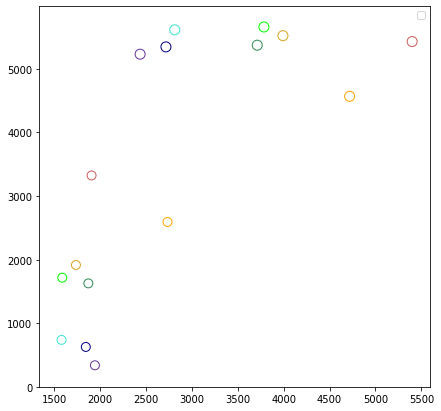

In [24]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','lime',
        'seagreen','turquoise','navy','rebeccapurple','black']

# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])
for ii in range(len(psf_trackIDs)):
    ax.scatter(psf_x[psf_trackIDs[ii]],psf_y[psf_trackIDs[ii]],s=100,\
            marker='o',facecolor='none',edgecolor=colors[ii])
    ax.scatter(flc_x[flc_trackIDs[ii]],flc_y[flc_trackIDs[ii]],s=80,\
            marker='o',facecolor='none',edgecolor=colors[ii])


# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


ax.legend()
plt.show()

In [25]:
rot_fx, rot_fy = rot(flc_x,flc_y)

No handles with labels found to put in legend.


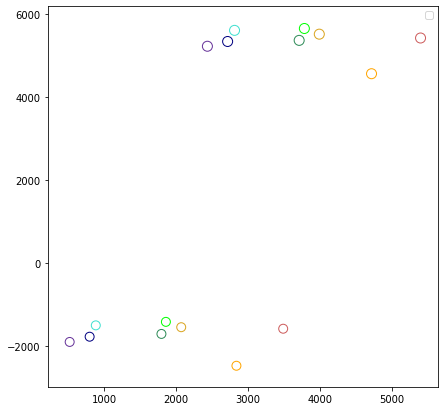

In [26]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','lime',
        'seagreen','turquoise','navy','rebeccapurple','black']

# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])
for ii in range(len(psf_trackIDs)):
    ax.scatter(psf_x[psf_trackIDs[ii]],psf_y[psf_trackIDs[ii]],s=100,\
            marker='o',facecolor='none',edgecolor=colors[ii])
    ax.scatter(rot_fx[flc_trackIDs[ii]],rot_fy[flc_trackIDs[ii]],s=80,\
            marker='o',facecolor='none',edgecolor=colors[ii])


# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


ax.legend()
plt.show()

In [28]:
flcPSF_r1 = np.genfromtxt('catRawMags1305/catDir/flc2PSF_round1.dat')

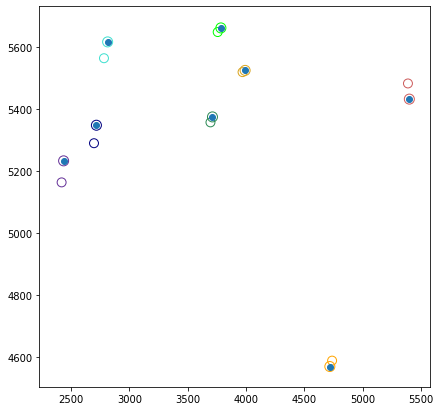

In [29]:
fig, ax = plt.subplots(figsize=(7,7))

colors=['indianred','orange','goldenrod','lime',
        'seagreen','turquoise','navy','rebeccapurple','black']

# for cc in range(len(colors)):
# #     ax.scatter(psf_1000[:,0][psf_idx[cc]],psf_1000[:,1][psf_idx[cc]],s=100,\
# #             marker='o',facecolor='none',edgecolor=colors[cc])
#     ax.scatter(roPSF_x[flc_idx[cc]]+1899,roPSF_y[flc_idx[cc]]+7065,s=100,\
#             marker='o',color='none',edgecolor=colors[cc])
for ii in range(len(psf_trackIDs)):
    ax.scatter(psf_x[psf_trackIDs[ii]],psf_y[psf_trackIDs[ii]],s=100,\
            marker='o',facecolor='none',edgecolor=colors[ii])
    ax.scatter(rot_fx[flc_trackIDs[ii]]+1899,\
               rot_fy[flc_trackIDs[ii]]+7065,s=80,\
            marker='o',facecolor='none',edgecolor=colors[ii])

ax.scatter(flcPSF_r1[:,0][flc_trackIDs],flcPSF_r1[:,1][flc_trackIDs],label='FLC Trans')
# ax.set_title('Lin Transform offset applied 50 FLC pixel pos')


# ax.legend()
plt.show()

In [30]:
diffX = (rot_fx[flc_trackIDs]+1899 - psf_x[psf_trackIDs])
avg_diffX = np.mean(diffX)
print(avg_diffX)

-16.032840017342778


In [31]:
diffY = (rot_fy[flc_trackIDs]+7065 - psf_y[psf_trackIDs])
avg_diffY = np.mean(diffY)
print(avg_diffY)

-18.367290811999396


In [32]:
print(flc_x[flc_trackIDs])
print(flc_y[flc_trackIDs])

[1905.8447 2733.5304 1735.3708 1586.7118 1870.5514 1578.4376 1843.0081
 1942.4414]
[3323.9234 2591.8753 1915.1314 1715.1404 1625.8418  736.2737  625.12
  336.7415]


In [33]:
print(rot_fx[flc_trackIDs])
print(rot_fy[flc_trackIDs])

[3489.19255567 2838.66038074 2070.59434489 1857.44664442 1795.37820268
  882.18082431  796.53370475  518.8455224 ]
[-1583.11278784 -2476.29022154 -1546.57012504 -1417.4811784
 -1708.4909154  -1501.77268973 -1775.66548884 -1901.9129197 ]


In [34]:
for ll in range(len(psf_x[psf_trackIDs])):
    print(psf_x[psf_trackIDs[ll]],psf_y[psf_trackIDs[ll]])

5400.123 5431.417
4718.1953 4569.6943
3991.6089 5523.9956
3783.894 5660.8569
3711.5825 5374.0845
2812.5161 5615.8149
2716.2554 5347.2842
2434.9197 5232.4946


In [35]:
for ll in range(len(flcPSF_r1[flc_trackIDs])):
    print(flcPSF_r1[:,0][flc_trackIDs[ll]],flcPSF_r1[:,1][flc_trackIDs[ll]])

5399.93993 5431.394264
4718.235439 4569.685357
3991.429183 5524.083034
3784.659685 5660.830917
3711.520956 5374.117592
2812.024342 5615.827006
2716.12411 5347.060022
2435.162358 5232.641877


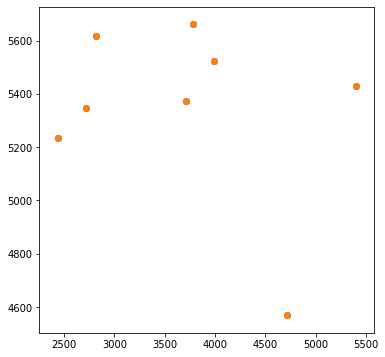

In [36]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(flcPSF_r1[:,0][flc_trackIDs],flcPSF_r1[:,1][flc_trackIDs],label='FLC Trans')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [37]:
flcRPSF_r1 = np.genfromtxt('catRawMags1305/catDir/flcR2PSF_round1.dat')

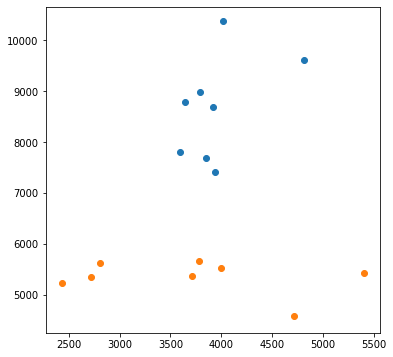

In [38]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(flcRPSF_r1[:,0][flc_trackIDs],flcRPSF_r1[:,1][flc_trackIDs],label='FLC Trans')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [39]:
rot_xR, rot_xY = rot(flcRPSF_r1[:,0],flcRPSF_r1[:,1])

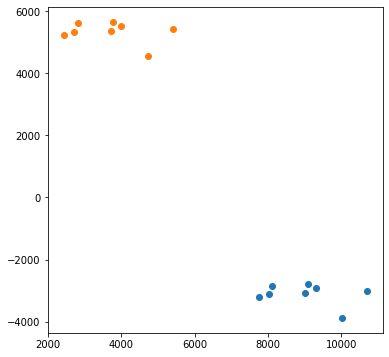

In [40]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xR[flc_trackIDs],rot_xY[flc_trackIDs],label='FLC Trans')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [41]:
flcRoPSF_r1 = np.genfromtxt('catRawMags1305/catDir/flcRo2PSF_round1.dat') #1899,7065

# Iter      18    CHI-SQUARE =  1.05753464  DOF =  10
#    P0 = -171.0621828
#    P1 = 0.9939024984
#    P2 = 0.0393411571
#    P3 = 198.1022678
#    P4 = -0.03974044916
#    P5 = 0.9937128357

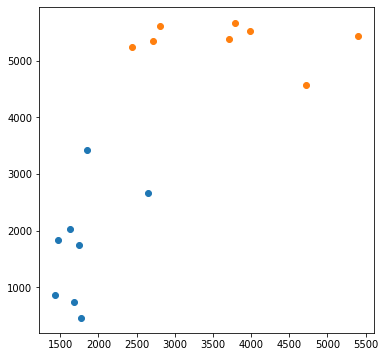

In [42]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(flcRoPSF_r1[:,0][flc_trackIDs],flcRoPSF_r1[:,1][flc_trackIDs],label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [43]:
rot_xRo, rot_yRo = rot(flcRoPSF_r1[:,0],flcRoPSF_r1[:,1])

In [44]:
xDiff = psf_x[psf_trackIDs] - rot_xRo[flc_trackIDs]
print(np.mean(xDiff))

yDiff = psf_y[psf_trackIDs] - rot_yRo[flc_trackIDs]
print(np.mean(yDiff))

1814.3173852639886
6953.913394438188


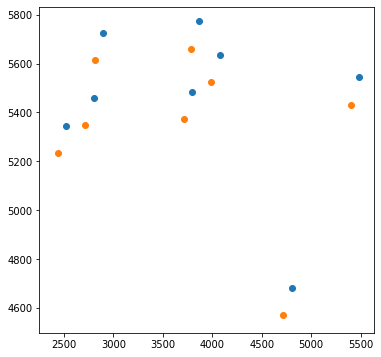

In [45]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xRo[flc_trackIDs]+1899,rot_yRo[flc_trackIDs]+7065,label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [46]:
print(rot_xRo[flc_trackIDs])
print(rot_yRo[flc_trackIDs])

[3585.295887   2903.40091105 2177.11897452 1970.44630487 1897.21169842
  997.99915618  902.01482972  621.06805614]
[-1521.83804699 -2383.99475618 -1429.67721631 -1292.980716
 -1579.78328926 -1338.37231302 -1607.23358587 -1721.78523188]


In [47]:
flcRoPSF_r2 = np.genfromtxt('catRawMags1305/catDir/flcRo2PSF_round2.dat') #1899,7065
# flc points given were rotated with an offset added
# Iter      21    CHI-SQUARE =  1.057534673  DOF =  10
#    P0 = -83.36242576
#    P1 = 1.000211582
#    P2 = -0.0003886220597

#    P3 = -108.463945
#    P4 = -0.0003886534739
#    P5 = 0.9997886127

In [48]:
rot_xRo2, rot_yRo2 = rot(flcRoPSF_r2[:,0],flcRoPSF_r2[:,1])

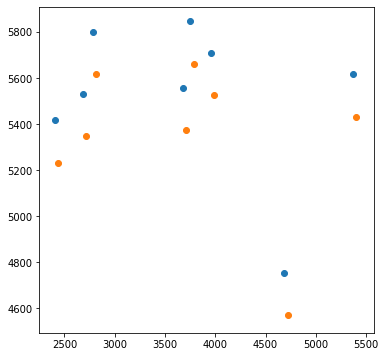

In [49]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xRo2[flc_trackIDs]+1899,rot_yRo2[flc_trackIDs]+7065,label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [50]:
flcRoPSF_r2noO = np.genfromtxt('catRawMags1305/catDir/flcRo2PSF_round2noO.dat')
# Iter      26    CHI-SQUARE =  1.057534673  DOF =  10
#    P0 = 1813.29374
#    P1 = 1.000211583
#    P2 = -0.0003886299064
#    P3 = 6954.304555
#    P4 = -0.0003886559991
#    P5 = 0.9997886121

In [51]:
rot_xRo2noO, rot_yRo2noO = rot(flcRoPSF_r2noO[:,0],flcRoPSF_r2noO[:,1])

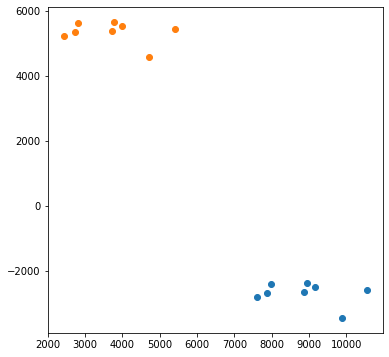

In [52]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(rot_xRo2noO[flc_trackIDs],rot_yRo2noO[flc_trackIDs],label='FLC Trans Off')
ax.scatter(psf_x[psf_trackIDs], psf_y[psf_trackIDs],label='PSF')


plt.show()

In [53]:
# DC,OC points to PSF
# Iter      22    CHI-SQUARE =  771518.9458  DOF =  10
#    P0 = 2561.659734
#    P1 = -0.27281871
#    P2 = 1.009636855
#    P3 = 6045.116257
#    P4 = -0.3589608044
#    P5 = 0.02247955964

file = np.genfromtxt('catRawMags1305/catDir/flc2PSF_round1_newMatch.dat')

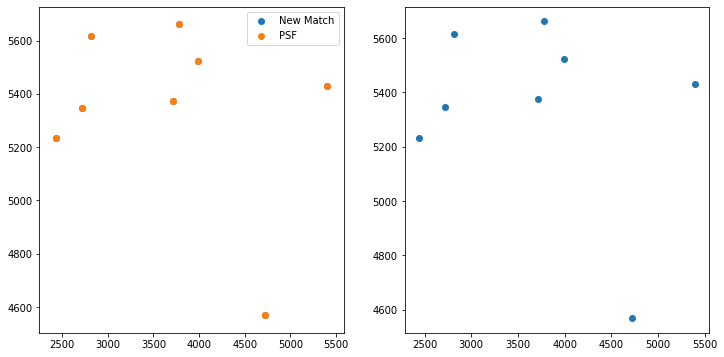

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))


ax1.scatter(file[:,0],file[:,1],label='New Match')
ax1.scatter(psf_x[psf_trackIDs],psf_y[psf_trackIDs],label='PSF')

ax2.scatter(file[:,0],file[:,1],label='New Match')

ax1.legend()
plt.show()

In [55]:
xDiff = psf_x[psf_trackIDs] - file[:,0]
print(np.mean(xDiff))

yDiff = psf_y[psf_trackIDs] - file[:,1]
print(np.mean(yDiff))

-5.684341886080802e-14
1.1368683772161603e-13


In [56]:
fileN = np.genfromtxt('catRawMags1305/catDir/flc2PSF_round1.dat')

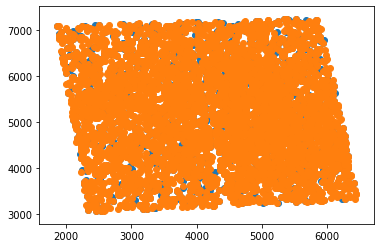

In [57]:
fig , ax = plt.subplots()

ax.scatter(fileN[:,0],fileN[:,1])
ax.scatter(psf_x,psf_y)


plt.show()

# 04 June

In [92]:
match_file = np.genfromtxt('catRawMags1305/catDir/match_0406.dat',names=True)

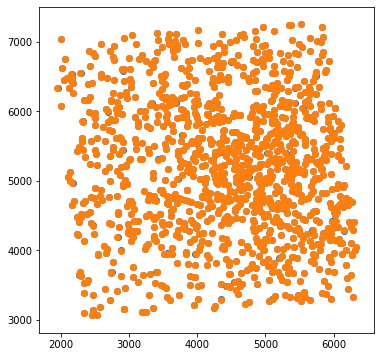

In [93]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(match_file['x_psf'],match_file['y_psf'],label='PSF')
ax.scatter(match_file['x_cat'],match_file['y_cat'],label='FLC')


plt.show()

In [94]:
xDiff = match_file['x_psf']-match_file['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_file['y_psf']-match_file['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

0.12029777334398055 -0.039889473264147546
0.4615789110372858 0.347722637994734


In [68]:
match_ref = match_file[abs(match_file['x_psf']-match_file['x_cat'])<0.01]

In [86]:
xDiff = match_ref['x_psf']-match_ref['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_ref['y_psf']-match_ref['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

0.0001666666667612541 0.0637493333333623
0.005655468936230888 0.3307322239005822


In [72]:
# np.savetxt(dir+'refStars0406.dat',match_ref,header='x_psf y_psf id_psf \
#     id_cat x_cat y_cat ',fmt='%1.5f %1.5f %d %d %1.5f %1.5f')

# Round 2

In [81]:
match_file2 = np.genfromtxt('catRawMags1305/catDir/match_0406r2.dat',names=True)

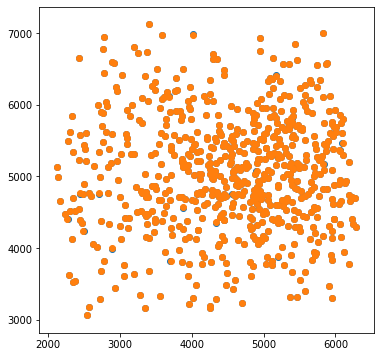

In [95]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(match_file2['x_psf'],match_file2['y_psf'],label='PSF')
ax.scatter(match_file2['x_cat'],match_file2['y_cat'],label='FLC')


plt.show()

In [96]:
xDiff = match_file2['x_psf']-match_file2['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_file2['y_psf']-match_file2['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

0.02948846038866176 -0.05260461883406834
0.2654083535049008 0.24300765492144338


In [101]:
match_ref = match_file2[abs(match_file2['x_psf']-match_file2['x_cat'])<0.01]

In [102]:
xDiff = match_ref['x_psf']-match_ref['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_ref['y_psf']-match_ref['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

6.666666498252501e-07 1.9999999797922404e-06
0.0049295104106069475 0.22886383742891137


In [103]:
np.savetxt(dir+'refStars0406r2.dat',match_ref,header='x_psf y_psf id_psf \
    id_cat x_cat y_cat ',fmt='%1.5f %1.5f %d %d %1.5f %1.5f')

# Round 3

In [104]:
match_file3 = np.genfromtxt('catRawMags1305/catDir/match_0406r3.dat',names=True)

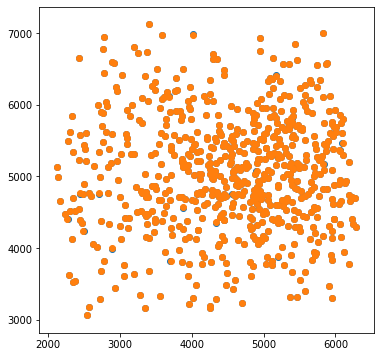

In [105]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(match_file3['x_psf'],match_file3['y_psf'],label='PSF')
ax.scatter(match_file3['x_cat'],match_file3['y_cat'],label='FLC')


plt.show()

In [106]:
xDiff = match_file3['x_psf']-match_file3['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_file3['y_psf']-match_file3['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

0.029486920777283997 -0.052618490283968096
0.2654067373006333 0.24300265933813345


In [112]:
match_ref = match_file3[abs(match_file3['x_psf']-match_file3['x_cat'])<0.01]
print(len(match_ref))

15


In [113]:
xDiff = match_ref['x_psf']-match_ref['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_ref['y_psf']-match_ref['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

-3.3333333703922106e-06 -9.333333249135952e-06
0.004929608052849394 0.22886435955153225


In [111]:
np.savetxt(dir+'refStars0406r3.dat',match_ref,header='x_psf y_psf id_psf \
    id_cat x_cat y_cat ',fmt='%1.5f %1.5f %d %d %1.5f %1.5f')

# Round 4

In [114]:
match_file4 = np.genfromtxt('catRawMags1305/catDir/match_0406r4.dat',names=True)

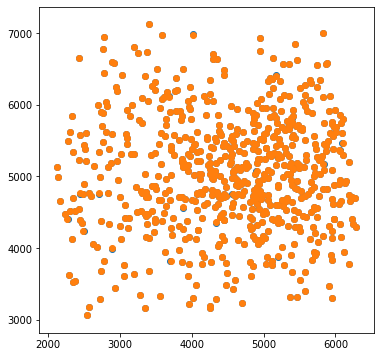

In [115]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(match_file4['x_psf'],match_file4['y_psf'],label='PSF')
ax.scatter(match_file4['x_cat'],match_file4['y_cat'],label='FLC')


plt.show()

In [116]:
xDiff = match_file4['x_psf']-match_file4['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_file4['y_psf']-match_file4['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

0.029479925261587558 -0.052600388639746566
0.26541116003475135 0.24298752204362095


In [117]:
match_ref = match_file4[abs(match_file4['x_psf']-match_file4['x_cat'])<0.01]

In [118]:
xDiff = match_ref['x_psf']-match_ref['x_cat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = match_ref['y_psf']-match_ref['y_cat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

-8.666666599310701e-06 1.0666666761001882e-05
0.0049277254612407955 0.2288635435207997


# Matching FLC to DRC

In [176]:
myFile = np.genfromtxt('catRawMags1305/catDir/matchedFLCdrc0506r2.dat',names=True)

In [177]:
xDiff = myFile['xDRC_trans'] - myFile['xDRC_mat']
xMean = np.mean(xDiff)
xStd = np.std(xDiff)

yDiff = myFile['yDRC_trans'] - myFile['yDRC_mat']
yMean = np.mean(yDiff)
yStd = np.std(yDiff)

print(xMean,yMean)
print(xStd,yStd)

0.01586387513571281 0.031304641693812606
1.2846002174778983 1.3505518479501122


In [178]:
fIDX = np.argsort(myFile['magDRC'])[:100]
f_100 = myFile[fIDX]

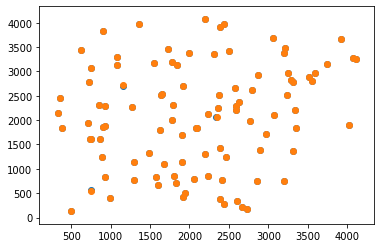

In [179]:
fig, ax = plt.subplots()


ax.scatter(f_100['xDRC_mat'],f_100['yDRC_mat'])
ax.scatter(f_100['xDRC_trans'],f_100['yDRC_trans'])

plt.show()

In [122]:
drc = np.genfromtxt('catRawMags1305/catDir/drc_useful.dat',names=True)

In [123]:
mF2 = np.genfromtxt(dir+'matched_w_MagsPos2705r2.dat',names=True)

In [173]:
RA, DEC, x, y, magr, id = 0, 1, 2, 3, 4, 5


RA, DEC, flux, flags, c_star, mag1, mag2, mag3, mag4, \
ra1, dec1, ra2, dec2, ra3, dec3, ra4, dec4, xr1, yr1, \
xr2, yr2, xr3, yr3, xr4, yr4, xc1, yc1, xc2, yc2, xc3, \
yc3, xc4, yc4, xt1, yt1, xt2, yt2, xt3, yt3, xt4, yt4 = \
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, \
17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, \
31, 32, 33, 34, 35, 36, 37, 38, 39, 40


flcCat = np.genfromtxt(dir+'matched_w_MagsPos2705r2.dat')
drcCat = np.genfromtxt(dir +'drc_useful.dat')

flcArr = np.array([flcCat[984],flcCat[680],flcCat[421],flcCat[549],flcCat[181],flcCat[109],flcCat[1]])

drcArr = np.array([drcCat[834],drcCat[523],drcCat[338],drcCat[467],drcCat[81],drcCat[44],drcCat[0]])

match_arr = np.zeros((len(flcArr),2))

match_arr[:,0] = flcArr[:,xt1]
match_arr[:,1] = flcArr[:,yt1]

master_arr = np.zeros((len(drcArr),2))

master_arr[:,0] = drcArr[:,x]
master_arr[:,1] = drcArr[:,y]

In [174]:
print(len(flcArr))

7


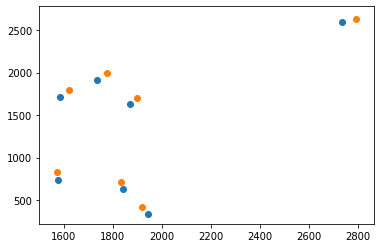

In [175]:
fig, ax = plt.subplots()

ax.scatter(match_arr[:,0],match_arr[:,1])
ax.scatter(master_arr[:,0],master_arr[:,1])

In [180]:
a = np.genfromtxt('catRawMags1305/catDir/flcDRCpos0506r2.dat',names=True)

In [184]:
a_idx = np.argsort(a['mag1'])[:1000]
a_100 = a[a_idx]

In [185]:
b = drcCat
b_idx = np.argsort(b[:,magr])[:1000]
b_100 = b[b_idx]

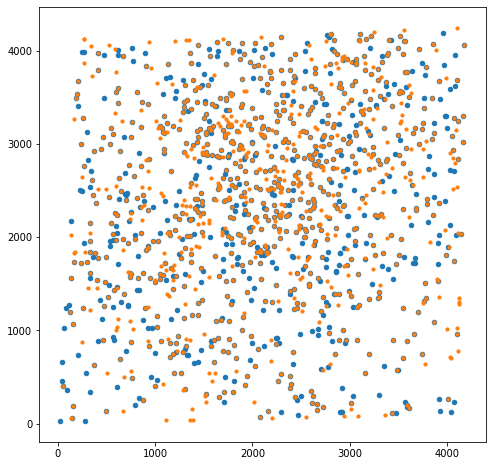

In [188]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(a_100['xDRC'],a_100['yDRC'],s=20)
ax.scatter(b_100[:,x],b_100[:,y],s=10)

plt.show()

In [189]:
file = np.genfromtxt(dir+'matchedFLCpsf0506.dat',names=True)

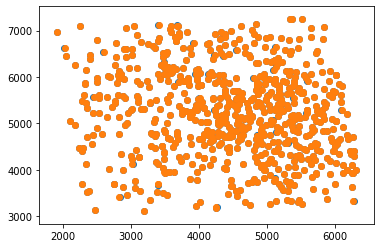

In [190]:
fig, ax = plt.subplots()


ax.scatter(file['xPSF_trans'],file['yPSF_trans'],label='FLC')

ax.scatter(file['xPSF_mas'],file['yPSF_mas'],label='PSF')

plt.show()

In [201]:
magDiff = file['magPSF']-file['magZPT']

print(np.mean(magDiff))
print(len(magDiff))

0.027416803337781383
732


In [200]:
xDiff = file['xPSF_trans'] - file['xPSF_mas']

yDiff = file['yPSF_trans'] - file['yPSF_mas']

print(np.mean(xDiff),np.mean(yDiff))


-0.26158290846996185 0.01860037568304466


In [194]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

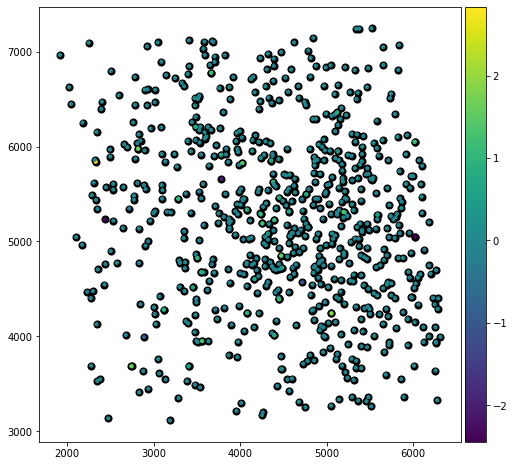

In [198]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(file['xPSF_mas'],file['yPSF_mas'],s=50,color='black')
im=ax.scatter(file['xPSF_trans'],file['yPSF_trans'],c=magDiff,s=10)


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()